<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Sarima_arima_of_turbiditycombined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df=pd.read_csv('turbidity.csv')
df.head()

,created_at,Turbiidity
0,2022-02-05 07:03:27 UTC,2257.92
1,2022-02-05 07:03:49 UTC,2285.38
2,2022-02-05 07:04:10 UTC,2172.46
3,2022-02-05 07:04:31 UTC,2172.46
4,2022-02-05 07:04:52 UTC,1955.05


In [116]:
df.tail()

,created_at,Turbiidity
522,2022-02-20 08:53:00 UTC,3000.00
523,2022-02-20 08:54:01 UTC,3000.00
524,2022-02-20 08:54:40 UTC,3004.29
525,2022-02-20 08:55:42 UTC,3000.00
526,2022-02-20 08:55:58 UTC,3000.00


In [117]:
df.colunms=["created_at	","Turbiidity"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,Turbiidity
0,2022-02-05 07:03:27 UTC,2257.92
1,2022-02-05 07:03:49 UTC,2285.38
2,2022-02-05 07:04:10 UTC,2172.46
3,2022-02-05 07:04:31 UTC,2172.46
4,2022-02-05 07:04:52 UTC,1955.05


In [118]:
df.tail()

,created_at,Turbiidity
522,2022-02-20 08:53:00 UTC,3000.00
523,2022-02-20 08:54:01 UTC,3000.00
524,2022-02-20 08:54:40 UTC,3004.29
525,2022-02-20 08:55:42 UTC,3000.00
526,2022-02-20 08:55:58 UTC,3000.00


In [119]:
df['created_at']=pd.to_datetime(df["created_at"])

In [120]:
df.head()

,created_at,Turbiidity
0,2022-02-05 07:03:27+00:00,2257.92
1,2022-02-05 07:03:49+00:00,2285.38
2,2022-02-05 07:04:10+00:00,2172.46
3,2022-02-05 07:04:31+00:00,2172.46
4,2022-02-05 07:04:52+00:00,1955.05


In [121]:
df.set_index("created_at",inplace=True)

In [122]:
df.head()

,Turbiidity
created_at,
2022-02-05 07:03:27+00:00,2257.92
2022-02-05 07:03:49+00:00,2285.38
2022-02-05 07:04:10+00:00,2172.46
2022-02-05 07:04:31+00:00,2172.46
2022-02-05 07:04:52+00:00,1955.05


In [123]:
df.shape

(527, 1)

In [124]:
df.describe()

,Turbiidity
count,527.000000
mean,2302.911347
std,960.904077
min,0.000000
25%,1784.320000
50%,3000.000000
75%,3000.000000
max,3004.480000


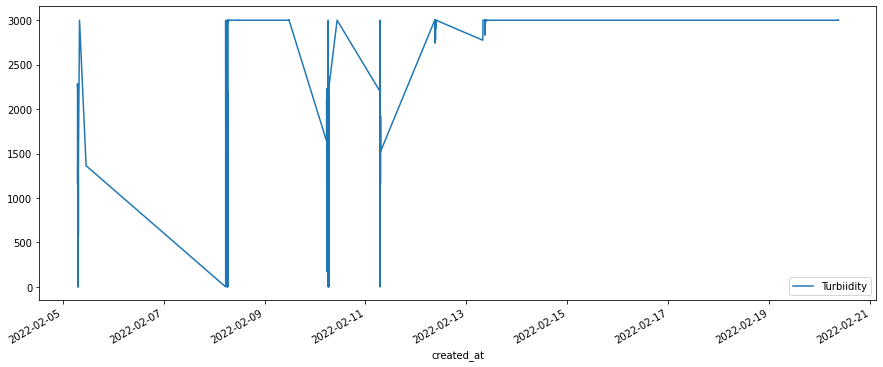

In [125]:
df.plot(figsize=(15,6))
plt.show()

In [126]:
from statsmodels.tsa.stattools import adfuller

In [127]:
test_result=adfuller(df['Turbiidity'])

In [128]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Turbiidity):
    result=adfuller(Turbiidity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [129]:
adfuller_test(df['Turbiidity'])

ADF Test Statistic : -2.678186150384638
p-value : 0.07788967942157689
#Lags Used : 5
Number of Observations Used : 521
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [130]:
df['Turbiidity First Difference'] = df['Turbiidity'] - df['Turbiidity'].shift(1)

In [131]:
df['Turbiidity'].shift(1)

created_at
2022-02-05 07:03:27+00:00        NaN
2022-02-05 07:03:49+00:00    2257.92
2022-02-05 07:04:10+00:00    2285.38
2022-02-05 07:04:31+00:00    2172.46
2022-02-05 07:04:52+00:00    2172.46
                              ...   
2022-02-20 08:53:00+00:00    3000.00
2022-02-20 08:54:01+00:00    3000.00
2022-02-20 08:54:40+00:00    3000.00
2022-02-20 08:55:42+00:00    3004.29
2022-02-20 08:55:58+00:00    3000.00
Name: Turbiidity, Length: 527, dtype: float64

In [132]:
df['Seasonal First Difference']=df['Turbiidity']-df['Turbiidity'].shift(12)

In [133]:
df.head(14)

,Turbiidity,Turbiidity First Difference,Seasonal First Difference
created_at,,,
2022-02-05 07:03:27+00:00,2257.92,NaN,NaN
2022-02-05 07:03:49+00:00,2285.38,27.46,NaN
2022-02-05 07:04:10+00:00,2172.46,-112.92,NaN
2022-02-05 07:04:31+00:00,2172.46,0.00,NaN
2022-02-05 07:04:52+00:00,1955.05,-217.41,NaN
2022-02-05 07:05:13+00:00,1854.15,-100.90,NaN
2022-02-05 07:05:34+00:00,1748.63,-105.52,NaN
2022-02-05 07:05:56+00:00,1888.30,139.67,NaN
2022-02-05 07:06:32+00:00,1151.57,-736.73,NaN


In [134]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.365418968266212
p-value : 4.002231066079384e-06
#Lags Used : 15
Number of Observations Used : 499
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


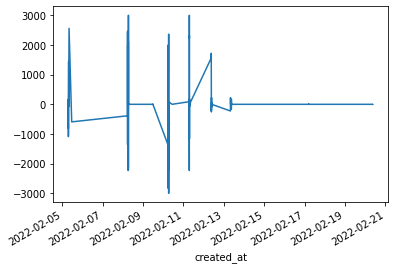

In [136]:
df['Seasonal First Difference'].plot()

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [137]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

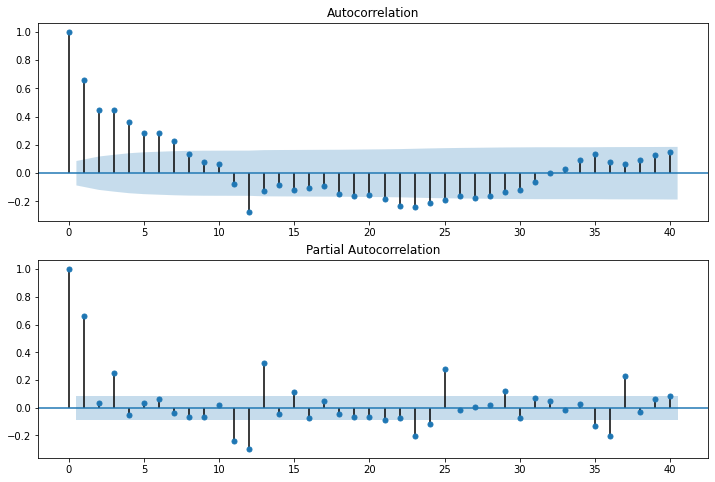

In [138]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [139]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [140]:
model=ARIMA(df['Turbiidity'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [141]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Turbiidity   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3949.623
Method:                       css-mle   S.D. of innovations            441.206
Date:                Sat, 26 Mar 2022   AIC                           7907.247
Time:                        03:53:55   BIC                           7924.308
Sample:                             1   HQIC                          7913.927
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8168      6.967      0.261      0.794     -11.839      15.473
ar.L1.D.Turbiidity     0.4718      0.072      6.586      0.000       0.331       0.612
ma.L1.D.Turbiidity    -0.8099      0.048    -16.800      0.000      -0.904      -0.715
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1197           +0.0000j            2.1197            0.0000
MA.1            1.2346           +0.0000j            1.2346            0.0000
-----------------------------------------------------------------------------
"""

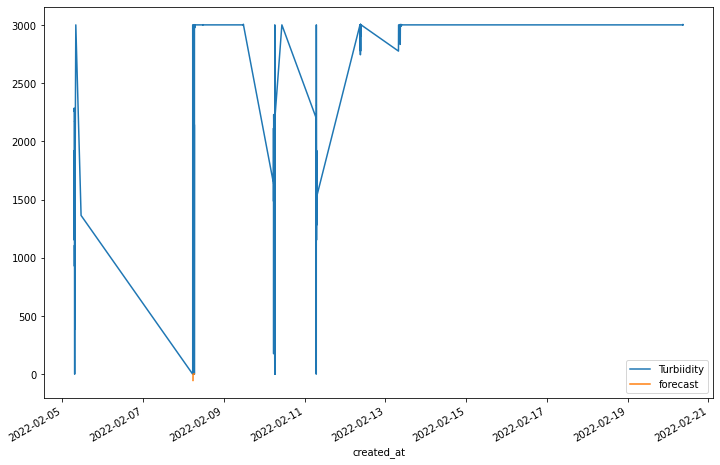

In [142]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Turbiidity','forecast']].plot(figsize=(12,8))

In [143]:
import statsmodels.api as sm

In [144]:
model=sm.tsa.statespace.SARIMAX(df['Turbiidity'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


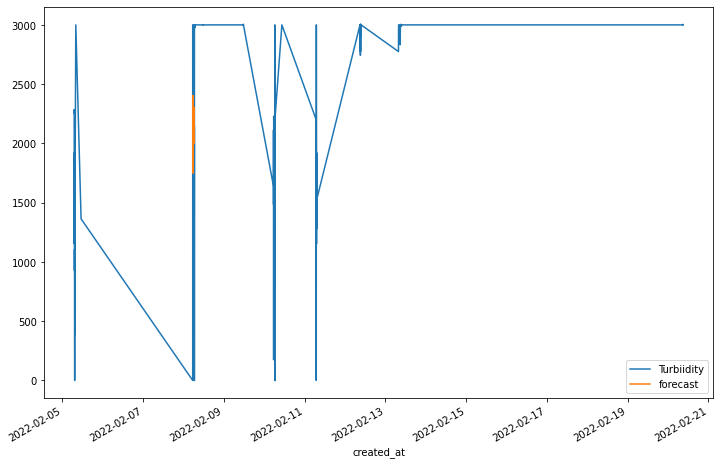

In [145]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Turbiidity','forecast']].plot(figsize=(12,8))

In [146]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [147]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [148]:
future_datest_df.tail()

,Turbiidity,Turbiidity First Difference,Seasonal First Difference,forecast
2023-09-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-10-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-11-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-12-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2024-01-20 08:55:58+00:00,NaN,NaN,NaN,NaN


In [149]:
future_df=pd.concat([df,future_datest_df])

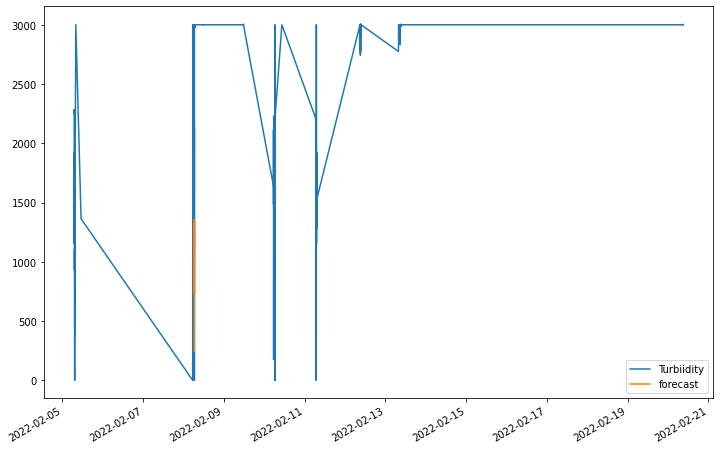

In [150]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Turbiidity', 'forecast']].plot(figsize=(12, 8)) 